In [4]:
%matplotlib notebook
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools, inspect
import math
pltcolors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
np.finfo(np.float32).eps

1.1920929e-07

[1.00000000e+00 1.00000000e+00 4.00000000e+00 2.70000000e+01
 2.56000000e+02 3.12500000e+03 4.66560000e+04 8.23543000e+05
 1.67772160e+07 3.87420489e+08 1.00000000e+10 2.85311671e+11
 8.91610045e+12 3.02875107e+14 1.11120068e+16 4.37893890e+17
 1.84467441e+19 8.27240262e+20 3.93464081e+22 1.97841966e+24
 1.04857600e+26 5.84258702e+27 3.41427877e+29 2.08804680e+31
 1.33373578e+33 8.88178420e+34 6.15611958e+36 4.43426488e+38
 3.31455231e+40 2.56768615e+42]


<IPython.core.display.Javascript object>


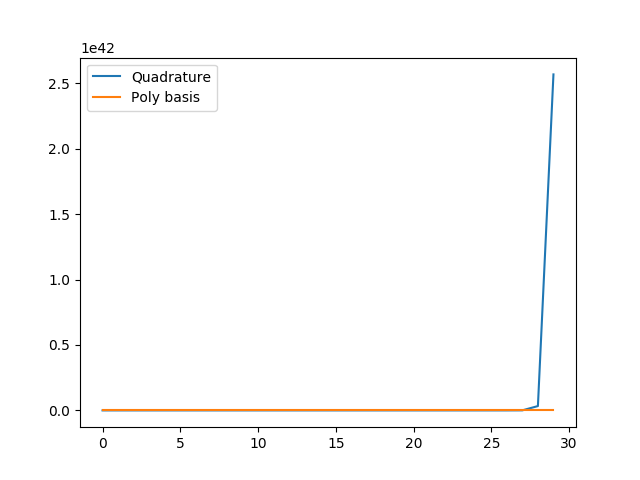

In [26]:
p = np.arange(30, dtype='float64')
d = np.arange(30, dtype='float64')
n_quad = []
n_poly = []
for iip, iid in zip(p, d):
    n_poly.append(math.factorial(iip+iid)/(math.factorial(iip)*math.factorial(iid)))
    n_quad.append(iip**iid)
n_quad = np.array(n_quad)
n_poly = np.array(n_poly)
print(n_quad)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(30), n_quad, label=r'Quadrature')
ax.plot(np.arange(30), n_poly, label=r'Poly basis')
ax.legend()

In [41]:
a = []
a.append(np.arange(12))
a.append(np.arange(12))
print(a)
b = np.array(a)
print(b.shape)

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])]
(2, 12)


In [36]:
norm = getattr(np.random, 'normal')
a = norm(size=10)
print(a.shape)


(10,)


In [17]:
xs = []
ws = []
for i, p in zip(range(2),[2,3]):
    x, w = np.polynomial.hermite_e.hermegauss(p)
    print(x,w)
    print(sum(w))
    xs.append(x)
    ws.append(w)
# print(np.sqrt(2*np.pi))
coord  = np.array(list(itertools.product(*xs))).T
weight = np.array(list(itertools.product(*ws))).T
print(coord)
print(weight)
weight = np.prod(weight, axis=0)
print(weight)

[-1.  1.] [1.25331414 1.25331414]
2.5066282746310002
[-1.73205081  0.          1.73205081] [0.41777138 1.67108552 0.41777138]
2.5066282746310002
[[-1.         -1.         -1.          1.          1.          1.        ]
 [-1.73205081  0.          1.73205081 -1.73205081  0.          1.73205081]]
[[1.25331414 1.25331414 1.25331414 1.25331414 1.25331414 1.25331414]
 [0.41777138 1.67108552 0.41777138 0.41777138 1.67108552 0.41777138]]
[0.52359878 2.0943951  0.52359878 0.52359878 2.0943951  0.52359878]


In [31]:
a = inspect.getmembers(stats)
# print(a)
print(len(a))
print('norm' in a)

257
False


In [3]:
class Foo(object):
    def __init__(self, func):
        self._func = func
    def __call__(self):
        print('a')
        self._func()
        print('b')
        
@Foo
def bar():
    print('bar')
bar()

a
bar
b


In [37]:
u = np.linspace(0,1,100)[1:-1]
x = stats.norm.ppf(u)
x = np.linspace(-5,5,100)
x_pdf = stats.norm.pdf(x)
x_pdf_is = stats.norm.pdf(x, loc=2.5, scale=0.5)
x_samples = stats.norm.rvs(size=1000)

<IPython.core.display.Javascript object>


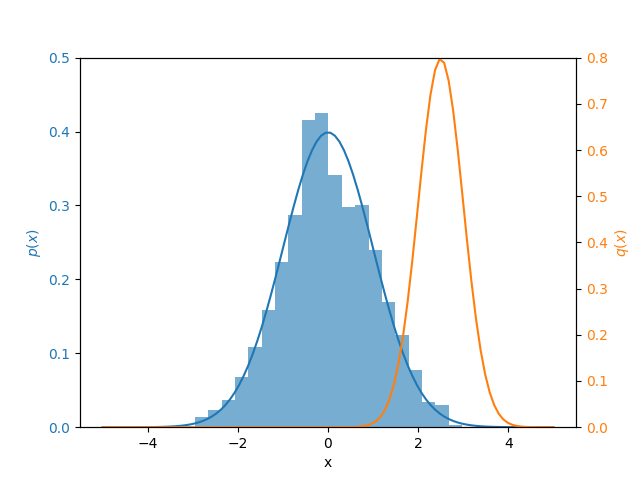

In [42]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
color=pltcolors[0]
ax.plot(x, x_pdf,color=color)
ax.hist(x_samples, bins=20,density=True, histtype='stepfilled',alpha=0.6)
# ax.legend(loc='best', frameon=False)
ax.set_xlabel('x')
ax.set_ylim(0,0.5)
ax.set_ylabel(r'$p(x)$',color=color)
ax.tick_params(axis='y', labelcolor=color)

plt.savefig('/Users/jinsongliu/BoxSync/Dissertation_UT/PhD_Dissertation/Presentation/Figures/normal_is-0.pdf')
color=pltcolors[1]
ax2 = ax.twinx()
ax2.plot(x, x_pdf_is,color=color)
ax2.set_ylim(0,0.8)
ax2.set_ylabel(r'$q(x)$',color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.savefig('/Users/jinsongliu/BoxSync/Dissertation_UT/PhD_Dissertation/Presentation/Figures/normal_is-1.pdf')

In [15]:
help(np.histogram)

Help on function histogram in module numpy:

histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the histogram of a set of data.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
      